In [52]:
import fastai.basics as fai
import fastai.vision as fv

import torch
import torch.nn as nn
import torch.nn.functional as F

import gc
from pathlib import Path

import random as rd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.cluster import KMeans
import tensorflow as tf
import warnings

In [2]:
import numpy as np
from PIL import ImageGrab
import cv2
import time
from IPython.display import clear_output
import ctypes
import pyautogui
import os

import fastai as fai
import fastai.vision as fv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import numpy as np
from pathlib import Path
import random as rd
import gc
import math
from copy import copy

from torch.utils.data import Dataset
from torchvision import transforms, utils

import PIL
import time
#import win32gui, win32ui, win32con, win32api

In [3]:
%matplotlib inline

---

## Importando el data set

Para el proyecto se usara el data set de mnist

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

1


(-0.5, 27.5, 27.5, -0.5)

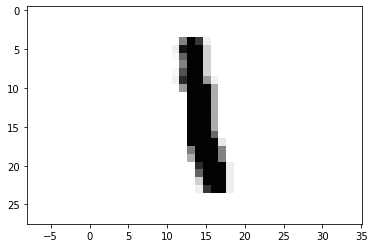

In [160]:
_a = rd.randint(0,10000)
_a = 6
print(y_train[_a]) # The label is 0
fig,ax = plt.subplots()

ax.imshow(x_train[_a], cmap="Greys")

#plt.imshow(x_train[_a], cmap='Greys')
#plt.Rectangle((0,0),10,10,color="green")

#rect = patches.Rectangle((10,3),5,5,linewidth=2,edgecolor='r',facecolor='none')

#ax.add_patch(rect)
plt.axis("equal")

In [158]:
x_test.shape

(600, 28, 28)

---

## Seleccionando el data set

Como el data set de mnist es demasiado grande lo reduciremos hasta 5000 imagenes de las 60000 imagenes originales en el train, para test se usaran solo 600

In [110]:
def separarDataSet(Xtrain:np.array, ytrain:np.array, Xtest:np.array, ytest:np.array, x_train_max:int=5000, x_test_max:int=600):
    """
        sperarDataSet sirve para separar el data set hasta un cierto datos seleccionado
        
        PRAMETROS
        =========
        
            Xtrain: np.array, obligatoria
                el conjunto de entrenamiento X
            
            ytrain: np.array, obligatoria
                el conjunto de entrenamiento
            
            Xtest: np.array, obligatoria
                el conjunto de prueba X
            
            ytest: np.array, obligatoria
                el conjunto de prueba y
        
            x_train_max: int, default=5000
                separa el conjunto de entrenamiento hasta un cierto numero, ytrain sera separado del mismo tamaño que este parametro
                
            x_test_max: int, default=600
                separa el conjunto de entrenamiento hasta un cierto numero, ytest sera separado del mismo tamaño que este parametro
                
        
        REGRESA
        =======
            4 subconjuntos de datos del data set original (x_train,y_train,x_test,y_test)
    """
    
                            ###################################
                            # Validacion de valores iniciales #
                            ###################################
                
    
    #Si x_train_max es un flotante todabia se hace el intento al convertirlo en int pero con una advertencia
    if(isinstance(x_train_max,int) or isinstance(x_train_max,float)):
        if(isinstance(x_train_max,float)):
            warnings.warn("x_train_max is a float It was converted to int " + str(x_train_max) + " -> " + str(int(x_train_max)))
        x_train_max = int(x_train_max)
    #Si x_train_max no es un int o float entonces regresamos error
    else:
        raise TypeError("x_train_max must be a int not a " + str(type(x_train_max)))
    
    #Si x_test_max es float todabia se hace el intento al convertirlo en int pero con una advertencia 
    if(isinstance(x_test_max,int) or isinstance(x_test_max,float)):
        if(isinstance(x_test_max,float)):
            warnings.warn("x_test_max is a float It was converted to int " + str(x_test_max) + " -> " + str(int(x_test_max)))
        x_test_max = int(x_test_max)
    #Si x_test_max no es int o float entonces regresamos error
    else:
        raise TypeError("x_test_max must be a int not a " + str(type(x_test_max)))
    
    #Si Xtrain no es un np.array entonces regresamos error
    if(type(Xtrain) != type(np.array([]))):
        raise TypeError("Xtrain must be a np.array not a " + str(type(Xtrain)))
    
    #Si ytrain no es un np.array entonces regresamos error
    if(type(ytrain) != type(np.array([]))):
        raise TypeError("ytrain must be a np.array not a " + str(type(ytrain)))
    
    #Si Xtest no es np.array entonces regresamos error
    if(type(Xtest) != type(np.array([]))):
        raise TypeError("Xtest must be a np.array not a " + str(type(Xtest)))
    
    #Si ytrain no es np.array entonces regresamos error
    if(type(ytrain) != type(np.array([]))):
        raise TypeError("ytrain must be a np.array not a " + str(type(ytrain)))
    
    #Si x_train_max es mayor que el conjunto de datos de Xtrain.shape[0] entonces regresamos error
    if(x_train_max > Xtrain.shape[0]):
        raise TypeError("x_train_max:" + str(x_train_max) + " must be less than Xtrain.shape[0]:" + str(X.train.shape[0]))
    
    #Si x_test_max es mayor que el conjunto de datos de Xtest.shape[0] entonces regresamos error
    if(x_test_max > Xtest.shape[0]):
        raise TypeError("x_test_max:" + str(x_test_max) + " must be less than Xtest.shape[0]:" + str(X.test.shape[0]))
        
        
                            #####################
                            # Ejcutar el codigo #
                            #####################
    #Si todo las condiciones son correctas entonces ahora si podemos ejecutar el codigo normal
    
    return Xtrain[:x_train_max],ytrain[:x_train_max],Xtest[:x_test_max],ytest[:x_test_max]

In [111]:
x_train, y_train, x_test, y_test = separarDataSet(x_train,y_train,x_test,y_test)

In [163]:
x_test[6][24]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 190, 128,  23,   6,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=uint8)

## Referencias

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d